In [105]:
# importing libraries
from sympy import *
import numpy as np
import math
import matplotlib.pyplot as plt

### The probability density function(PDF):

In [106]:
t=symbols('t')
λ = symbols('λ')

pdf = (2*t)*exp((-(t**2))/(λ**2))/λ**2
pdf

2*t*exp(-t**2/λ**2)/λ**2

In [1]:
λ = 500 # λ is a parameter, with specifically λ = 500days.
pdf = (2*t)*exp((-(t**2))/(λ**2))/λ**2 # with only t as a variable.

NameError: name 't' is not defined

### The PDF is plotted below:

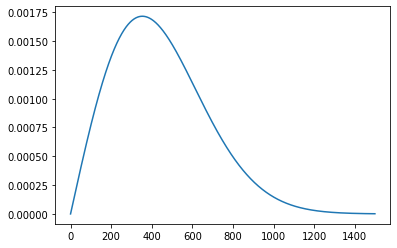

In [108]:
def PDF(t, λ = λ):

    if t >= 0:
        return (2*t)*np.exp((-(t**2))/(λ**2))/λ**2
    else:
        return 0
        
arr = np.array([])
for t0 in range(1500):
    arr = np.append(arr,PDF(t0))

plt.plot(arr);

## a. Confirming that this is a valid PDF:

In [109]:
# checking if it is non-negative everywhere:
print(f'Number of Nigative Values = {(arr<0).sum()}')

Number of Nigative Values = 0


In [110]:
# checking if the area under the curve equals 1:
print("area under the curve =", integrate(pdf, [t,0,oo]))

area under the curve = 1


## b. How long after installation should we do preventative maintenance if we wish to have the probability of unexpected failure be less than 1%, 10%, 50%, and 99%?

In [111]:
def time_after_installation(target):

    for idxt, _ in enumerate(arr):

        narr = arr[:idxt]

        if np.trapz(narr) >= target:

            return idxt-1

days = []

for p in [0.01,0.1,0.5,0.99]:
    
    ndays = time_after_installation(p)
    days.append(ndays)
    print(f'To have a prbability of unexpected failure be less than {int(p*100)}%, you should do preventative maintenance at day: {ndays}')

To have a prbability of unexpected failure be less than 1%, you should do preventative maintenance at day: 51
To have a prbability of unexpected failure be less than 10%, you should do preventative maintenance at day: 163
To have a prbability of unexpected failure be less than 50%, you should do preventative maintenance at day: 417
To have a prbability of unexpected failure be less than 99%, you should do preventative maintenance at day: 1073


## c. What is the expected lifetime for this pump? What is the probability of failure before the expected lifetime?

In [112]:
elt = integrate(t*pdf, [t,0,oo])
print(f'The expected lifetime is: {round(elt)} days')

The expected lifetime is: 443 days


In [113]:
pf = round(integrate(pdf,[t,0,elt]),4)
print(f'The probability of failure before the expected lifetime is: {pf*100}%')

The probability of failure before the expected lifetime is: 54.41%


## d. What is the variance of the pump’s lifetime? What is the range of the lifetime that falls within one standard deviation of the expected value?

In [114]:
vlt = integrate(pdf*( t  -elt )**2 , [t,0, oo])
print(f'The variance of the pump’s lifetime is: {round(vlt,2)}')
print(f'The standard deviation of the pump’s lifetime is: {round(sqrt(vlt),2)}')

The variance of the pump’s lifetime is: 53650.46
The standard deviation of the pump’s lifetime is: 231.63


#### Getting the CDF before writing a program that generates samples of t from its distribution:

In [115]:
cdf = integrate(pdf,[t, 0,t])
cdf

1 - exp(-t**2/250000)

## e. Write a program that generates samples of t from its distribution.

In [116]:
def avg_rnng_cst(Tm ,n_samples = 10**6, Cr = 250, Cm= 50):

    smpl_arr = rnng_cst_arr = np.zeros((n_samples,))
    
    for s in range(n_samples):

        unfrm = np.random.uniform()
        smpl_arr[s] = math.log(-1/(unfrm-1))*1000

        if smpl_arr[s] <= Tm:
            rnng_cst_arr[s] = Cr/smpl_arr[s]
        else:
            rnng_cst_arr[s] = Cm/Tm

    avg_R = round(np.mean(rnng_cst_arr),4)    
    avg_smpl = round(np.mean(smpl_arr),4)
    var_smpl = round(np.var(smpl_arr),4)

    print(f'Average cost for Tm = {Tm} was: {avg_R}$')
    print(f'Sample average was: {avg_smpl}')
    print(f'Sample variance was: {var_smpl}')

In [117]:
for Tm in [1,10,100,1000,10000]:
    avg_rnng_cst(Tm)
    print("-"*44)

Average cost for Tm = 1 was: 52.2617$
Sample average was: 52.2617
Sample variance was: 376976.7833
--------------------------------------------
Average cost for Tm = 10 was: 7.1793$
Sample average was: 7.1793
Sample variance was: 35753.194
--------------------------------------------
Average cost for Tm = 100 was: 3.7559$
Sample average was: 3.7559
Sample variance was: 124511.8361
--------------------------------------------
Average cost for Tm = 1000 was: 5.3792$
Sample average was: 5.3792
Sample variance was: 2882009.4656
--------------------------------------------
Average cost for Tm = 10000 was: 3.4937$
Sample average was: 3.4937
Sample variance was: 175245.8277
--------------------------------------------
